In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 

In [2]:
# reading police dataset csv and dropping county_name, violation_raw columns

df = pd.read_csv('police.csv', index_col=False)
df = df.drop_duplicates().reset_index(drop=True)
df = df.drop(columns = ['county_name', 'violation_raw'])
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91257,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,False,NaN,Warning,False,0-15 Min,False
91258,2015-12-31,20:35,F,1982.0,33.0,White,Equipment,False,NaN,Warning,False,0-15 Min,False
91259,2015-12-31,20:45,M,1992.0,23.0,White,Moving violation,False,NaN,Warning,False,0-15 Min,False
91260,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,False,NaN,Citation,False,0-15 Min,False


In [3]:
# converting stop_date and stop_time columns into datetime data type

df['stop_date'] = pd.to_datetime(df['stop_date'])
df['stop_time'] = pd.to_datetime(df['stop_time'])

In [4]:
df.dtypes

stop_date             datetime64[ns]
stop_time             datetime64[ns]
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
dtype: object

In [5]:
# creating a year column using dt to get the year from the stop_date column

df['year'] = df.stop_date.dt.year

In [6]:
# querying and subsetting the dataframe 

df = df.query('stop_duration != "2"')
df = df.query('stop_duration != "1"')

In [7]:
df.stop_duration.value_counts()

0-15 Min     69369
16-30 Min    13566
30+ Min       3202
Name: stop_duration, dtype: int64

In [8]:
# renaming driver_age_raw column into driver_year_born

df = df.rename (columns = {'driver_age_raw': 'driver_year_born'})

### What race of people are searched the most?

In [10]:
race_search = df.groupby(['driver_race'])['search_conducted'].mean().reset_index()
#race_search = race_search.sort_values(by='search_conducted', ascending=False).value_counts(normalize=True)
race_search = race_search.value_counts(normalize=True) \
                          .reset_index() \
                          .sort_values(by='search_conducted', ascending=False)
race_search

,driver_race,search_conducted,0
1,Black,0.064601,0.2
2,Hispanic,0.061511,0.2
4,White,0.028434,0.2
0,Asian,0.022616,0.2
3,Other,0.012552,0.2


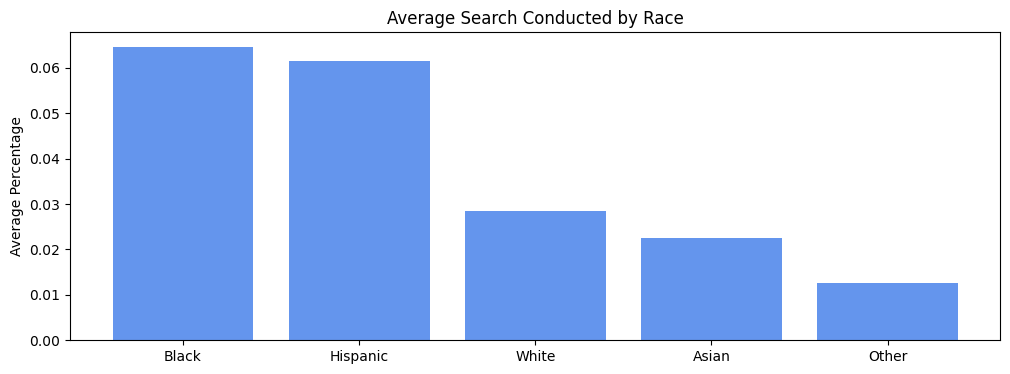

In [68]:
race = race_search['driver_race']
search = race_search['search_conducted']

plt.figure(figsize=(12,4))
plt.bar(race, search, color='cornflowerblue')
plt.title("Average Search Conducted by Race")
plt.ylabel("Average Percentage")
plt.show()


In [12]:
df.describe()

,driver_year_born,driver_age,year
count,86143.000000,85850.000000,91260.000000
mean,1970.497591,34.012370,2010.269680
std,110.883493,12.737345,3.027323
min,0.000000,15.000000,2005.000000
25%,1967.000000,23.000000,2008.000000
50%,1980.000000,31.000000,2010.000000
75%,1987.000000,43.000000,2013.000000
max,8801.000000,99.000000,2015.000000


In [14]:
# dropping null values within the driver_year_born and driver_age columns

df = df.dropna(subset = ['driver_year_born'])
df = df.dropna(subset = ['driver_age'])

In [15]:
# converting the driver_age_born and driver_age columns into a integer data type

df['driver_year_born'] = df['driver_year_born'].astype(int)
df['driver_age'] = df['driver_age'].astype(int)

In [16]:
df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             7
driver_year_born          0
driver_age                0
driver_race               5
violation                 5
search_conducted          0
search_type           82666
stop_outcome              5
is_arrested               5
stop_duration             5
drugs_related_stop        0
year                      0
dtype: int64

In [17]:
df.describe()

,driver_year_born,driver_age,year
count,85850.000000,85850.000000,85850.000000
mean,1976.270192,34.012370,2010.282563
std,13.064226,12.737345,3.044154
min,1914.000000,15.000000,2005.000000
25%,1967.000000,23.000000,2008.000000
50%,1980.000000,31.000000,2010.000000
75%,1987.000000,43.000000,2013.000000
max,1999.000000,99.000000,2015.000000


### What age gets pulled over speeding the most?

In [18]:
df2 = df.query('violation == "Speeding"') \
         .groupby(['violation'])['driver_age'].mean().reset_index() \
         .sort_values(by='driver_age')
df2

,violation,driver_age
0,Speeding,33.528454


### Which year did speeding violations occur the most?

In [19]:
viol_count_year = df.query('violation == "Speeding"') \
                            .groupby(['year'])['violation'].count().reset_index()
viol_count_year

,year,violation
0,2005,1800
1,2006,7677
2,2007,6735
3,2008,5372
4,2009,3894
5,2010,3700
6,2011,3676
7,2012,4375
8,2013,3472
9,2014,3978


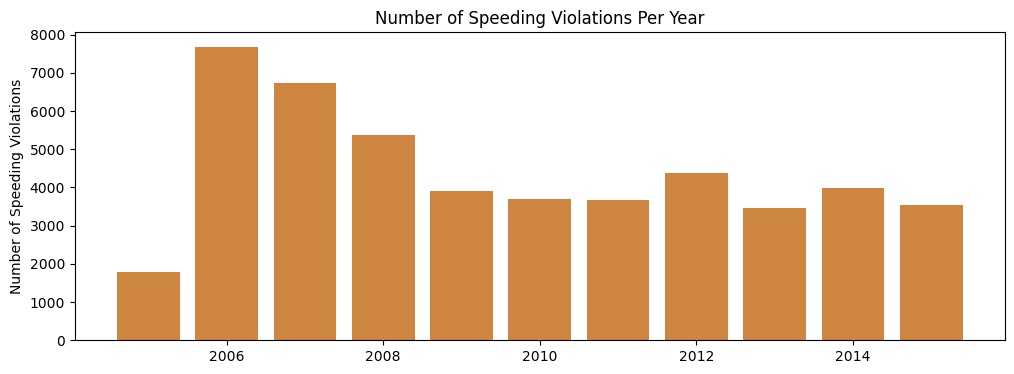

In [69]:
year = viol_count_year['year']
viol = viol_count_year['violation']

plt.figure(figsize=(12,4))

plt.bar(year, viol, color='peru')
plt.title("Number of Speeding Violations Per Year")
plt.ylabel("Number of Speeding Violations")
plt.show()

### Which violation is most prominent amongst the dataset?

In [21]:
violation_values = df.violation.value_counts().reset_index()
violation_values

,index,violation
0,Speeding,48218
1,Moving violation,16111
2,Equipment,10977
3,Other,4186
4,Registration/plates,3407
5,Seat belt,2946


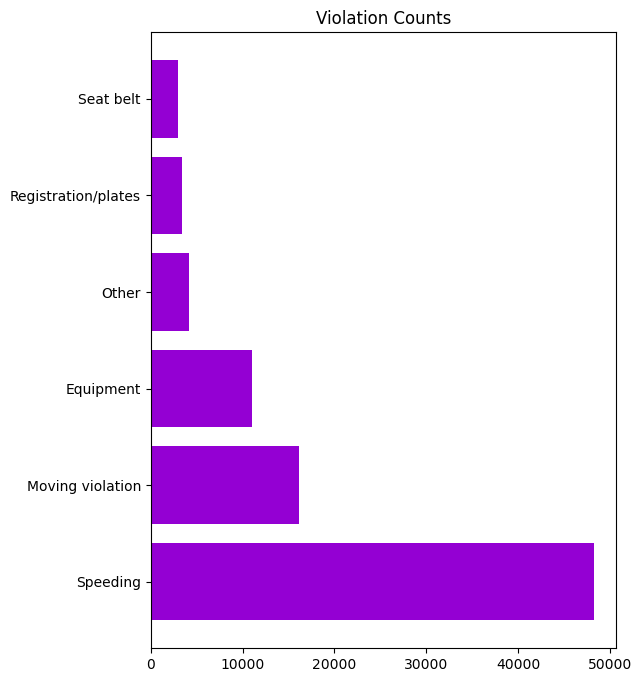

In [80]:
index = violation_values['index']
viol1 = violation_values['violation']

plt.figure(figsize=(6,8))

plt.barh(index, viol1, color='darkviolet')
plt.title("Violation Counts")
plt.show()

### Have seat belt violations gone up through the years?

In [25]:
seat_belt_yearly = df.query('violation == "Seat belt"') \
                            .groupby(['year'])['violation'].count().reset_index()
seat_belt_yearly

,year,violation
0,2012,20
1,2013,676
2,2014,1205
3,2015,1045


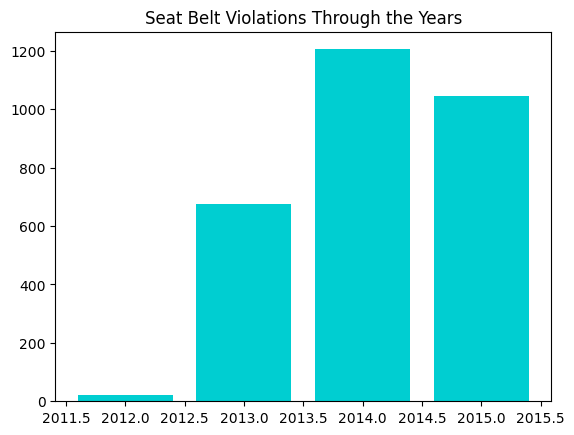

In [81]:
seat_year = seat_belt_yearly['year']
seat_violation = seat_belt_yearly['violation']

plt.bar(seat_year, seat_violation, color='darkturquoise')
plt.title("Seat Belt Violations Through the Years")
plt.show()


### Can we see which years have the most violations overall?

In [47]:
viol_year = df.groupby(['year'])['violation'].count().reset_index() \
  .sort_values(by='year', ascending=True)
viol_year

,year,violation
0,2005,2466
1,2006,10056
2,2007,8826
3,2008,8053
4,2009,7186
5,2010,6945
6,2011,7563
7,2012,10373
8,2013,7397
9,2014,8798


### Looks like 2006 and 2012 have the most violations overall

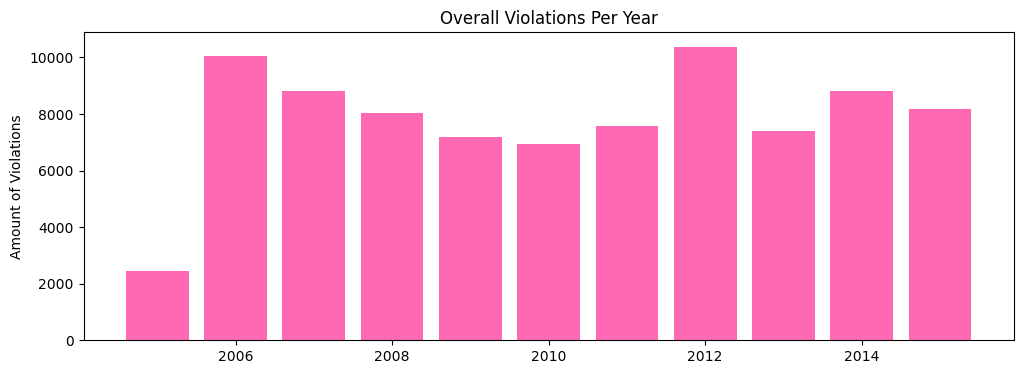

In [86]:
viol_yearr = viol_year['year']
viol_vio = viol_year['violation']

plt.figure(figsize=(12,4))

plt.bar(viol_yearr, viol_vio, color='hotpink')
plt.ylabel("Amount of Violations")
plt.title("Overall Violations Per Year")
plt.show()

In [109]:
stopee = df.groupby(['stop_duration'])['is_arrested'].count().reset_index() \
            .sort_values(by='is_arrested', ascending=False)
stopee

,stop_duration,is_arrested
0,0-15 Min,69162
1,16-30 Min,13490
2,30+ Min,3193


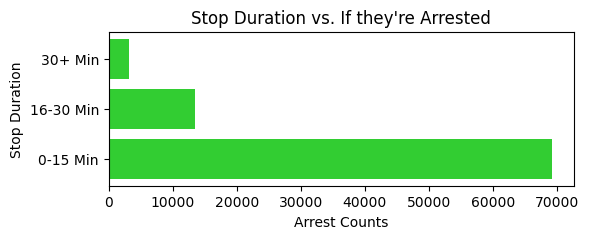

In [136]:
duration = stopee['stop_duration']
arrest = stopee['is_arrested']

plt.figure(figsize=(6,2))

plt.barh(duration, arrest, color='limegreen')
plt.title("Stop Duration vs. If they're Arrested")
plt.xlabel("Arrest Counts")
plt.ylabel("Stop Duration")
plt.show()


In [128]:
df.groupby(['driver_race','stop_duration'])['search_conducted'].count().reset_index() \
.sort_values(by='search_conducted', ascending=False).head()

,driver_race,stop_duration,search_conducted
12,White,0-15 Min,50221
13,White,16-30 Min,9545
3,Black,0-15 Min,9438
6,Hispanic,0-15 Min,7410
4,Black,16-30 Min,2078


### Which race, according to this dataset commited the most violations?

In [147]:
race_viol = df.groupby(['driver_race'])['violation'].count().reset_index() \
            .sort_values(by='violation', ascending=False)
race_viol

,driver_race,violation
4,White,61759
1,Black,12151
2,Hispanic,9448
0,Asian,2249
3,Other,238


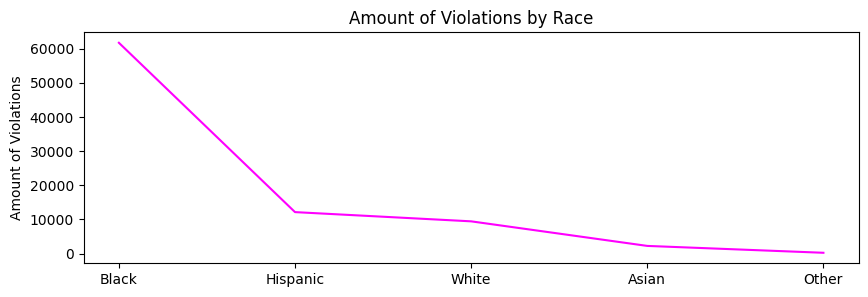

In [158]:
racee = race_viol['driver_race']
violl = race_viol['violation']

plt.figure(figsize=(10,3))

plt.plot(race, violl, color='magenta')
plt.title("Amount of Violations by Race")
plt.ylabel("Amount of Violations")
plt.show()

### Which gender had the most violations?

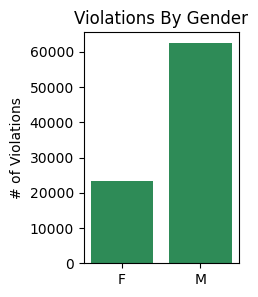

In [172]:
gender_viol = df.groupby(['driver_gender'])['violation'].count().reset_index()

gennn = gender_viol['driver_gender']
violll = gender_viol['violation']

plt.figure(figsize=(2,3))

plt.bar(gennn, violll, color='seagreen')
plt.title("Violations By Gender")
plt.ylabel("# of Violations")
plt.show()